## 토픽분석

In [2]:
import sys
sys.path.append('./data_prep')
sys.path.append('./models')
sys.path.append('./visualization')
import nlp
# from data_preparation import get_data
# df = get_data()
# data = nlp.okt_tokenize(df)
# documents = nlp.strip_csv(data, nlp.stop_words)
# text_df = nlp.topic_model(df, documents, 3)

import pandas as pd
data = pd.read_csv("./data_prep/okt_tokenized.csv", encoding='euc-kr', index_col='id')
documents = nlp.strip_csv(data, nlp.stop_words)
text_df = pd.read_csv('./data_prep/LDA_topic_text.csv', encoding='euc-kr', index_col='id')

[(0,\
  '0.017*"오피스텔" + 0.015*"주차" + 0.015*"도보" + 0.011*"거실" + 0.011*"풀" + '
  '0.010*"신축" + 0.009*"호선" + 0.009*"시설" + 0.009*"월세" + 0.008*"전세"'),\
 (1,\
  '0.026*"관리" + 0.020*"주차" + 0.016*"원룸" + 0.013*"풀" + 0.013*"단기" + 0.012*"전기" '
  '+ 0.012*"별도" + 0.012*"인터넷" + 0.011*"시설" + 0.010*"월세"'),\
 (2,\
  '0.026*"도보" + 0.026*"원룸" + 0.026*"시설" + 0.021*"편의" + 0.021*"주차" + 0.021*"풀" '
  '+ 0.014*"편의점" + 0.011*"교통" + 0.011*"채광" + 0.011*"신축"')]

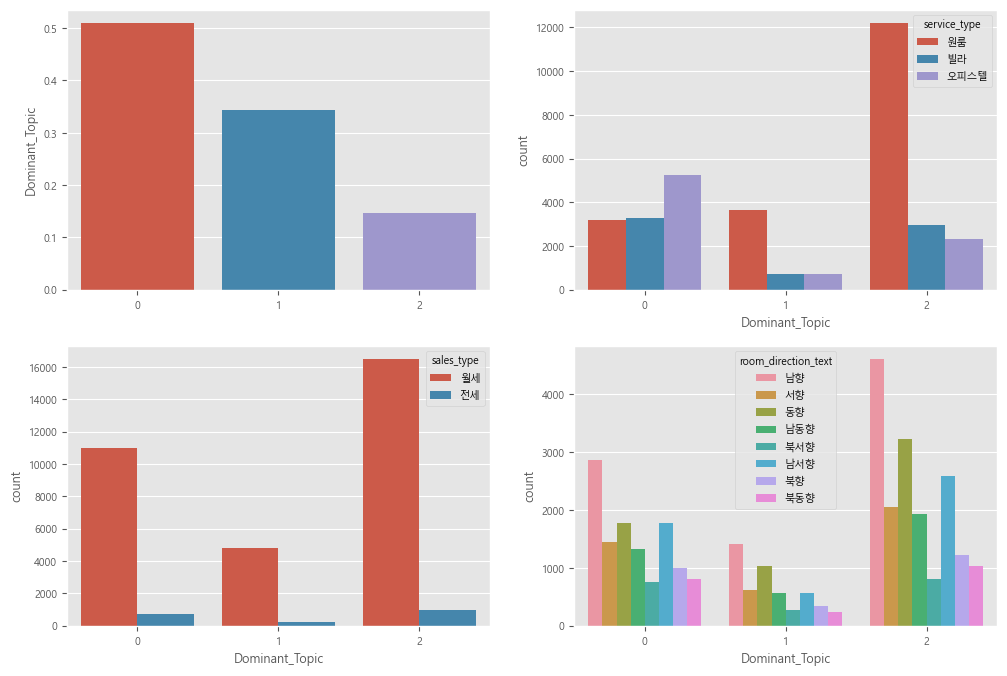

In [2]:
nlp.nlp_categorical_plot(text_df)

### 토픽별 non-text feature 분석 (boxplot)
: 각 토픽에 포함될 확률이 50% 이상 매물들로 한정하여 확인

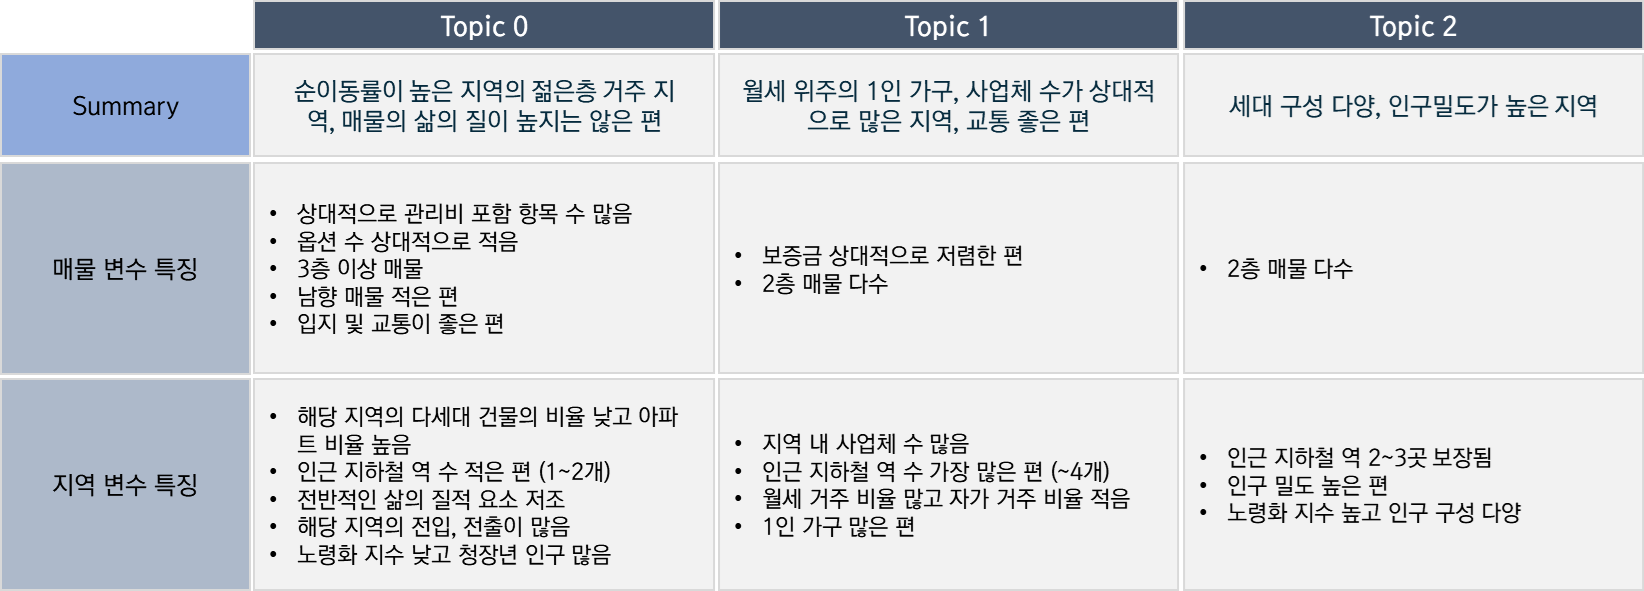

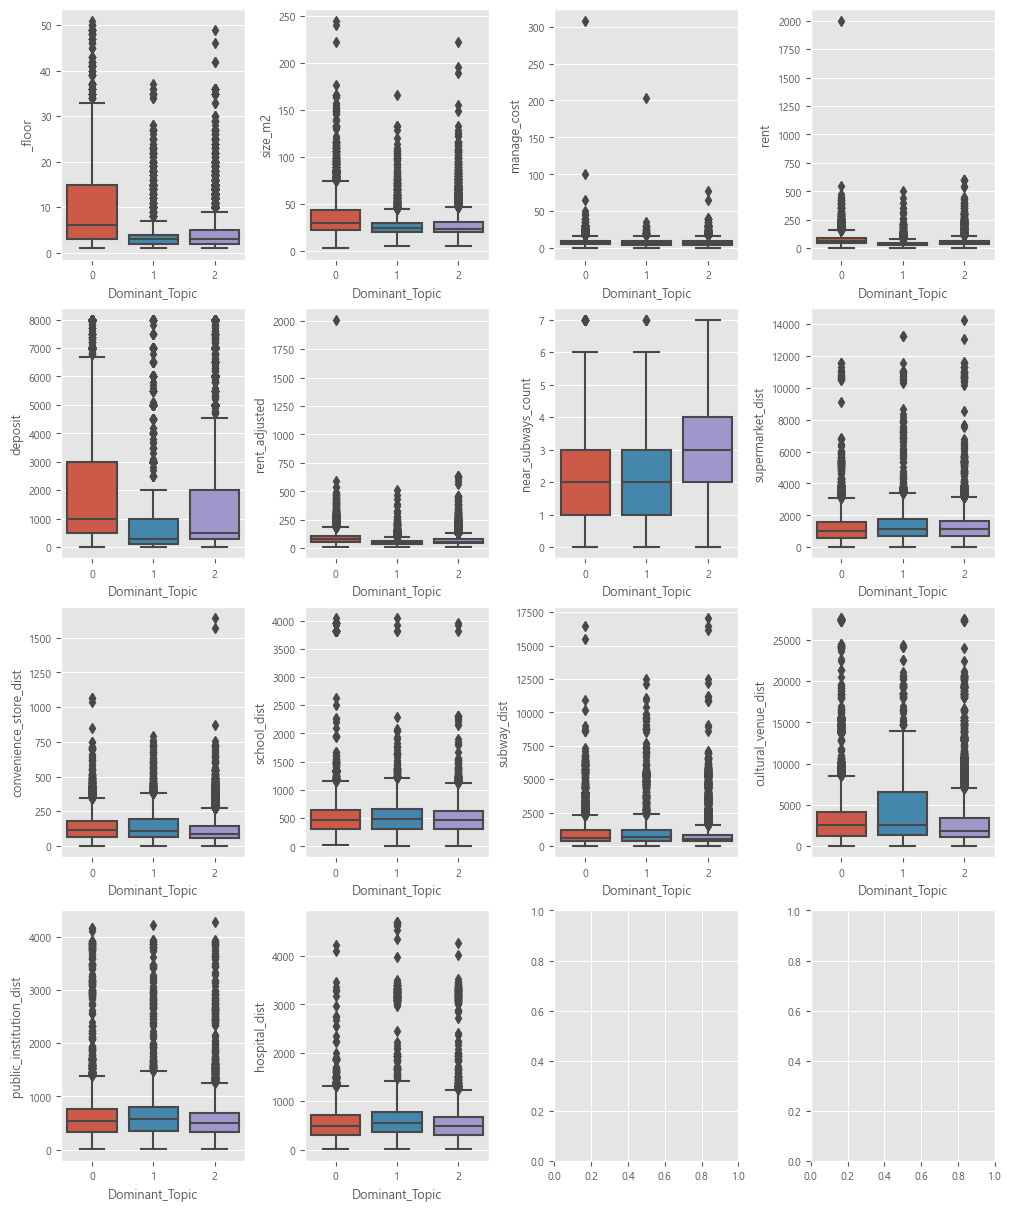

In [3]:
# 토픽별 매물 변수 분포 확인
nlp.box_by_topic(text_df, 'zigbang')

c:\Users\junel\Desktop\Multicampus\0_SemiProject\data_prep\nlp.py:179: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.savefig(f"{mode}_box_by_topic.png")
c:\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


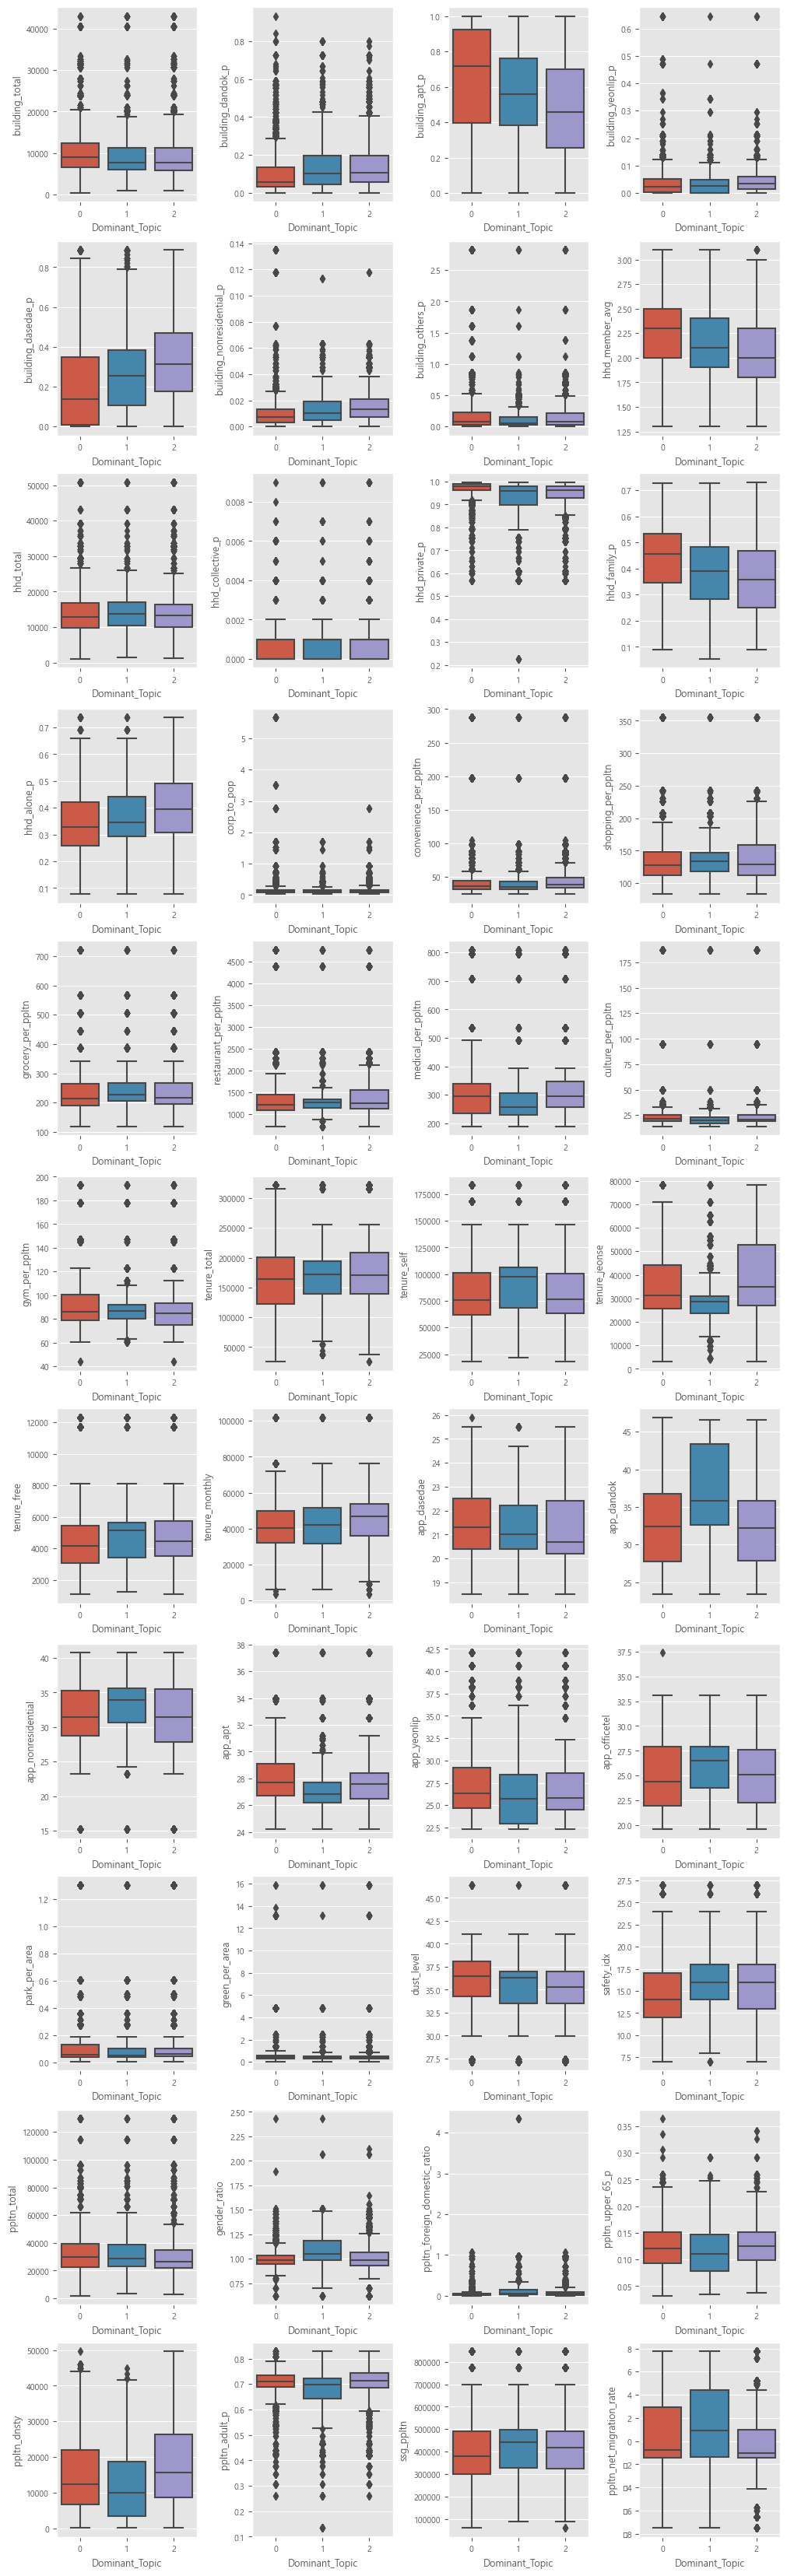

In [4]:
# 토픽별 지역특징 변수 분포 확인
nlp.box_by_topic(text_df, 'local')

### 토픽별 folium 지도 시각화
- 토픽0 주요단어: '보증금, 원룸, 월세, 관리'
원룸, 자취생 → 관악구
- 토픽1 주요단어: 신축, 시설, 편의 채광
직장인 → 강남구 집중분포
- 토픽2 주요단어: 오피스텔, 주차
가족단위 → 하남시, 외곽

In [5]:
# import folium_visualize

# map_df = text_df[['address1', 'address2', 'y_w84', 'x_w84', 'Dominant_Topic']]
# map_by_topic = folium_visualize.create_map(map_df, 'Dominant_Topic')
# map_by_topic

In [6]:
# map_by_topic.save("map_by_topic.html")

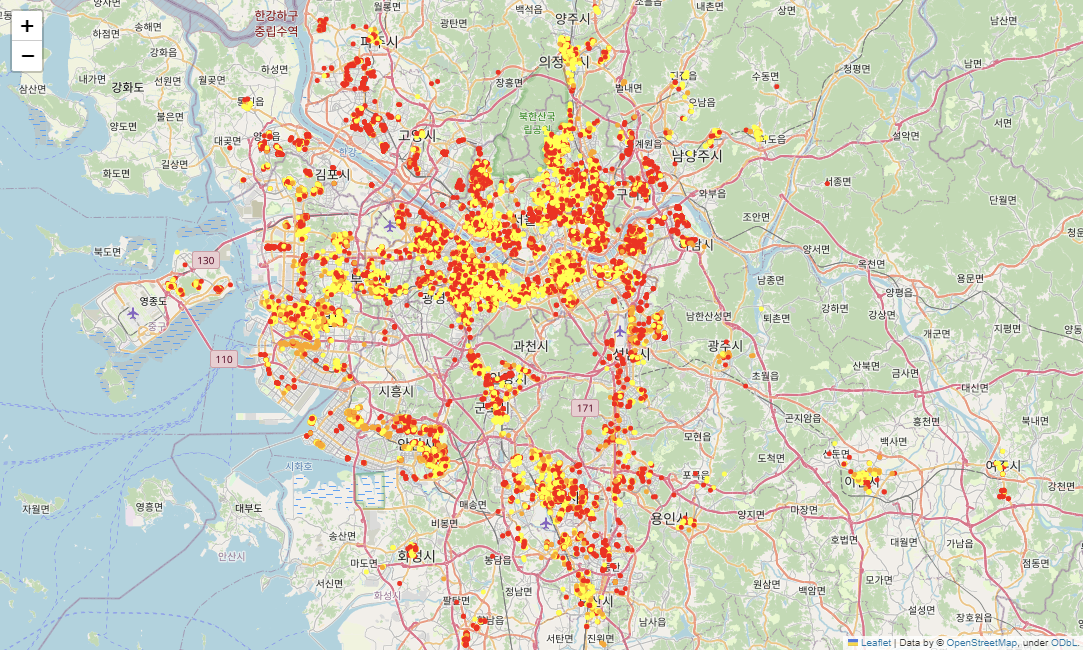

## 워드클라우드

### 토픽별 워드클라우드

Dominant_Topic 0 WordCloud


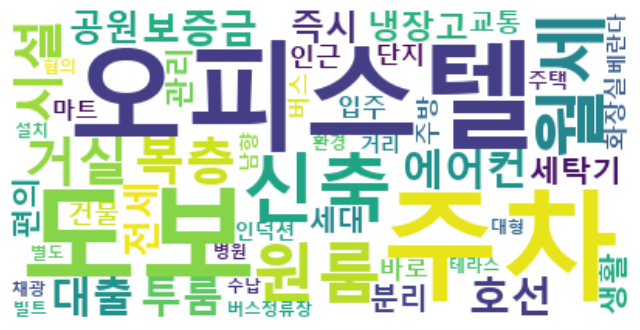

Dominant_Topic 1 WordCloud


<Figure size 640x480 with 0 Axes>

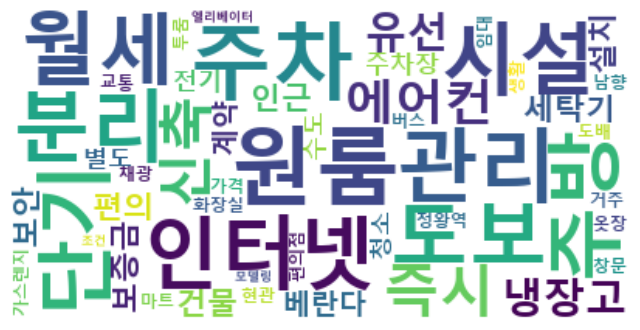

Dominant_Topic 2 WordCloud


<Figure size 640x480 with 0 Axes>

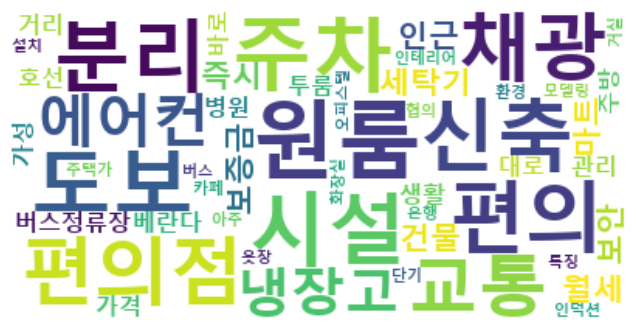

<Figure size 640x480 with 0 Axes>

In [7]:
for topic in range(0,3): 
    nlp.wordCloud(text_df, nlp.stop_words, 'Dominant_Topic', topic)

### 시군구별 워드클라우드
: 시군구 입력시 해당 클라우드 표출

입력하신 시군구 지역 :  마포구
sgg_cd 11140 WordCloud


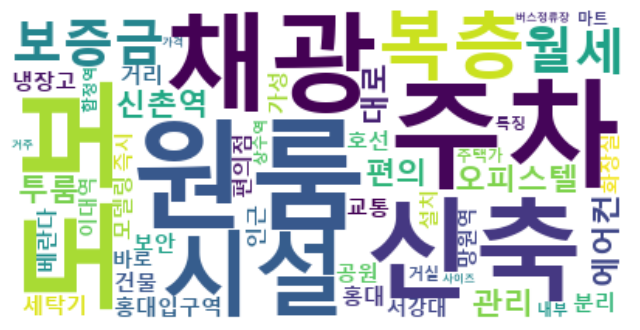

<Figure size 640x480 with 0 Axes>

In [8]:
nlp.wordCloud_by_sgg(text_df)